In [3]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [6]:
 !pip install imageio==2.4.1
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 7.1 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=c3fdd9a9b45880efab22308f7d371672c8d9d020c0386b812f74732d63592d28
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [7]:
pip install PyOpenGL PyOpenGL_accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 6.6 MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp37-cp37m-linux_x86_64.whl size=1599568 sha256=4296c235ae4bc24c487389b68b6683baf2fcde898fb0b8e43f5ed24dfba3849f
  Stored in directory: /root/.cache/pip/wheels/1c/f5/6f/169afb3f2d476c5e807f8515b3c9bc9b819c3962316aa804eb
Successfully built PyOpenGL-accelerate


In [8]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show
import math

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2662400/45929032 bytes (5.8%)5668864/45929032 bytes (12.3%)9519104/45929032 bytes (20.7%)13352960/45929032 bytes (29.1%)17498112/45929032 bytes (38.1%)21676032/45929032 bytes (47.2%)25370624/45929032 bytes (55.2%)29384704/45929032 bytes (64.0%)33382400/45929032 bytes (72.7%)37330944/45929032 bytes (81.3%)40894464/45929032 bytes (89.0%)44171264/45929032 bytes (96.2%)

In [13]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL
import OpenGL.GL as gl
from OpenGL.GLU import *


# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,800
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [14]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(.5,.3,.7)
gl.glPointSize(7)

gl.glBegin(gl.GL_LINES)
gl.glVertex2f(0,-1)
gl.glVertex2f(0,1)
gl.glVertex2f(1,0)
gl.glVertex2f(-1,0)
gl.glEnd()

gl.glColor3f(0,.5,0)
gl.glBegin(gl.GL_POINTS)
gl.glVertex2f(.75,.80 )
gl.glVertex2f(.1, 0)
gl.glEnd()







In [15]:
import random
x_min = 0 
x_max = 6
y_min = -5
y_max = 5

# x_min = -6 
# x_max = 6
# y_min = -4|
# y_max = 4

In [49]:
def findzone(x1,y1, x2,y2):  #FIND THE ZONE
  zone = 0
  dx = x2 - x1
  dy = y2 - y1
  if abs(dx) >= abs(dy):
    if dx > 0 and dy > 0:
      zone = 0
    elif dx < 0 and dy > 0:
      zone = 3
    elif dx < 0 and dy < 0:
      zone = 4 
    elif dx > 0 and dy < 0:
      zone = 7 
  else: 
    if dx > 0 and dy>  0:
      zone = 1
    elif dx < 0 and dy > 0:
      zone = 2
    elif dx < 0 and dy <0:
      zone = 5
    elif  dx >= 0 and dy < 0:
      zone = 6
  return zone


In [17]:
def convertToZone0(x1, y1, x2, y2, zone):
  if zone == 0:
    return x1,y1, x2, y2
  elif zone==1:
    return y1, x1, y2,x1
  elif zone == 2:
    return y1, -x1,y2, -x2
  elif zone == 3:
    return -x1, y1, -x2, y2
  elif zone == 4:
    return -x1, -y1, -x2, -y2
  elif zone == 5:
    return -y1, -x1, -y2, -x2 
  elif zone == 6:
    return -y1, x1, -y2, x2
  else:
    return x1, -y1, x2, -y2 

In [18]:
def convertToOrginalZone(x,y,zone):
  a,b =0, 0
  if zone==0:
    a,b = x , y
  elif zone ==1:
    a,b = y,x
  elif zone==2:
    a,b = -y,x
  elif zone ==3:
    a,b = -x,y
  elif zone ==4:
    a,b = -x,-y
  elif zone == 5:
    a,b = -y,-x
  elif zone ==6:
    a,b = y, -x
  else:
    a,b = x, -y
  return a, b


In [50]:
def calculateMidPoint(x1,y1,x2,y2):
  zone =findzone(x1,y1,x2,y2)
  a1, b1, a2, b2 = convertToZone0(x1,y1,x2,y2, zone)
  drawLine(a1,b1,a2,b2, zone) 

In [47]:
def drawLine(x1, y1, x2, y2, zone):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    d = 2 * dy - dx
    incE = 2 * dy
    incNE = 2 * dy - 2 * dx
   
    x = x1
    y = y1
    while x <= x2:
        x = x + 1
        if d >= 0:
          d = d+ incNE
          y = y+1
        else:
            d = d + incE
        
        a, b = convertToOrginalZone(x,y,zone)
        state = cohen_sutherland(a/10, b/10, a/10, b/10)
        if state == 'inside':
          gl.glColor3f(.003,.004,.006)
          gl.glPointSize(5)
          gl.glBegin(gl.GL_POINTS)
          gl.glVertex2f(a/100,b/100)
          gl.glEnd()
        else:
          gl.glColor3f(.255, 0, 0)
          gl.glPointSize(5)
          gl.glBegin(gl.GL_POINTS)
          gl.glVertex2f(a/100,b/100)
          gl.glEnd()
          


In [60]:
def midpointcircle(r,c1,c2,red, green, blue, size):
  d = 1-r
  x = 0
  y = r
  circlePoints(x,y,c1, c2,red, green, blue, size)
  while x <= y:
    if d < 0:
      #choose E
      d = d+((2*x)+3)
      x = x+1
    else:
      #NE
      d = d +((2*x)-(2*y)+5)
      x = x+ 1
      y = y-1
    circlePoints(x,y,c1,c2,red, green, blue, size) 

In [61]:
def circlePoints(x,y,c1,c2,red, green, blue, size):
  gl.glPointSize(size)
  x = x/100
  y = y/100
  c1 = c1 /100
  c2 = c2/ 100
  
  
  state = cohen_sutherland(x+c1, y +c2 ,x +c1, y +c2)
  if state == 'inside':
     gl.glColor3f(red, green, blue)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(x +c1, y +c2)
     gl.glEnd()
  else:                             #zone0
     gl.glColor3f(.255, 0, 0)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(x +c1, y +c2)
     gl.glEnd()  
  
  state = cohen_sutherland( y+c1, x +c2 , y +c1, x +c2)
  if state == 'inside':
     gl.glColor3f(red, green, blue)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(y +c1, x +c2)
     gl.glEnd()
  else:                                 #zone1
     gl.glColor3f(.255, 0, 0)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(y +c1, x +c2)
     gl.glEnd()     
  
  state = cohen_sutherland( -y+c1, x +c2 , -y +c1, x +c2)
  if state == 'inside':
     gl.glColor3f(red, green, blue)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(-y+c1, x +c2)
     gl.glEnd()
  else:                             #zone2
     gl.glColor3f(.255, 0, 0)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(-y+c1, x +c2)
     gl.glEnd()     

  state = cohen_sutherland( -x+c1, y +c2 , -x +c1, y +c2)
  if state == 'inside':
     gl.glColor3f(red, green, blue)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f( -x+c1, y +c2 )
     gl.glEnd()
  else:                             #zone3
     gl.glColor3f(.255, 0, 0)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f( -x+c1, y +c2 )
     gl.glEnd()       

  state = cohen_sutherland( -x+c1, -y +c2 , -x +c1, -y +c2)
  if state == 'inside':
     gl.glColor3f(red, green, blue)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f( -x+c1, -y +c2 )
     gl.glEnd()
  else:                             #zone4
     gl.glColor3f(.255, 0, 0)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(-x+c1, -y +c2 )
     gl.glEnd()       

  state = cohen_sutherland( -y+c1, -x +c2 , -y +c1, -x +c2)
  if state == 'inside':
     gl.glColor3f(red, green, blue)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(  -y+c1, -x +c2 )
     gl.glEnd()
  else:                             #zone5
     gl.glColor3f(.255, 0, 0)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f( -y+c1, -x +c2 )
     gl.glEnd()  

  state = cohen_sutherland( y+c1, -x +c2 , y +c1, -x +c2)
  if state == 'inside':
     gl.glColor3f(red, green, blue)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(y+c1, -x +c2)
     gl.glEnd()
  else:                             #zone6
     gl.glColor3f(.255, 0, 0)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f( y+c1, -x +c2 )
     gl.glEnd()           

  state = cohen_sutherland( x+c1, -y +c2 , x +c1, -y +c2)
  if state == 'inside':
     gl.glColor3f(red, green, blue)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f( x+c1, -y +c2 )
     gl.glEnd()
  else:                             #zone7
     gl.glColor3f(.255, 0, 0)
     gl.glBegin(gl.GL_POINTS)
     gl.glVertex2f(x+c1, -y +c2)
     gl.glEnd()            





          
          





In [62]:
def calculate_outcode(x,y):
  global x_min
  global x_max
  global y_min
  global y_max
  if (x <x_min):
    bit0 = 1
  else:
    bit0 = 0
  if (x > x_max):
    bit1 = 1
  else:
    bit1 = 0
  if (y < y_min):
    bit2 = 1
  else:
    bit2 = 0
  if (y > y_max):
    bit3 = 1
  else:
    bit3 = 0
  return str(bit3) + str(bit2) + str(bit1) + str(bit0)

In [25]:
def cohen_sutherland(x1, y1, x2, y2):
  oc1 =calculate_outcode(x1,y1)
  oc2 =calculate_outcode(x2,y2)
  oc1Dec = int(oc1, base = 2)
  oc2Dec = int(oc2, base = 2)
  while True:
    if (oc1==oc2== "0000"):
      return "inside"
      break
    elif (oc1 !="0000"):
      return "outside"
      break
    else:
      if (oc1!="0000"):
        x1, y1 = find_intersection(oc1,x1,y1,x2,y2)
        oc1 = calculate_outcode(x1,y1)
      else:
        x2, y2 = find_intersection(oc2,x1,y1,x2,y2)
        oc2 = calculate_outcode(x2,y2)


In [68]:
def find_intersection(outcode, x1, y1, x2,y2):
  global x_min
  global x_max
  global y_min
  global y_max
  m = (y2-y1)/(x2-x1)
  if(outcode.startswith("1")): #TOP
    y = y_max
    x = x1 + ((1/m)* (y_max - y1))  
  
  elif(outcode.startswith("01")): #Bottom
    y = y_min
    x = x1+((1/m)* (y_min - y1))     
  
  elif(outcode.endswith("10")): #Right
    x = x_max
    y = y1 + (( m * (x_max - x1))
   
  elif(outcode.endswith("1")):  #left
    x = x_min
    y = y1 + (( m * (x_min - x1))   
  return x, y


SyntaxError: ignored

In [64]:
#creates a clipping window based on the values given as input
def create_clipping_window(x_min, x_max, y_min,y_max):
  gl.glLineWidth(5)
  gl.glColor3f(0, 0, 0)
  gl.glBegin(gl.GL_LINES)
  
  #AROVE
  gl.glVertex2f(x_min/10, y_max/10)
  gl.glVertex2f(x_max/10, y_max/10)
  
  #below
  gl.glVertex2f(x_min/10, y_min/10)
  gl.glVertex2f(x_max/10, y_min/10)
  
  #Right
  gl.glVertex2f(x_max/10, y_max/10)
  gl.glVertex2f(x_max/10, y_min/10)
  
  #left
  gl.glVertex2f(x_min/10, y_max/10)
  gl.glVertex2f(x_min/10, y_min/10)
  gl.glEnd()


In [39]:
#generates random points to drawn
def generate_random (x_min,x_max, y_min,y_max, r,g,b,size,count):
  gl.glPointSize(size)

  for i in range(count):
    x = random.randint(x_min, x_max) /100
    y = random.randint(y_min, y_max) /100
    state = cohen_sutherland( x, y, x, y)
    if state == 'inside':
      gl.glColor3f(r, g, b)
      gl.glBegin(gl.GL_POINTS)
      gl.glVertex2f( x, y )
      gl.glEnd()
    else:                             
      gl.glColor3f(.255, 0, 0)
      gl.glBegin(gl.GL_POINTS)
      gl.glVertex2f(x, y)
      gl.glEnd()            


In [40]:
gl.glClearColor(.255, .255,.255,0)
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

#lower body
generate_random (-41, 36,-9,-8, .171, .179, .160,5,1000) #A
generate_random (-14, 8,-9,-8, .142, .147, .134,5,100) #B
generate_random (-43, 38,-7,-1, .219, .229, .228,5,1000) #C
generate_random (-40, 36,0,2, .245, .246, .247,5,1000) #D
generate_random (-33, 29, 3, 4, .245, .246, .247,5,1000) #E
generate_random (-12, 24, 5, 6, .245, .246, .247,5,500) #F
generate_random (-10, 22, 6, 7, .245, .246, .247,5,500) #G
generate_random (-7, 16, 7, 9, .245, .246, .247,5,500) #H

#blue STRIPE
generate_random (-43, 38, -4, -3, .067, .098, .170,5, 1000) 

#decals
generate_random (13, 15, 3, 3, .255, 0, 0,5,50) 
generate_random (13, 14, 4, 4, .255, 0, 0,3,50)

#HEAD LIGHT
generate_random (-43, -40, -4, -3, .219, .034, .042 ,5, 10)
generate_random (-43, -42, -4, -3, .255, 0, 0,5,100)

#TAIL LIGHT
generate_random (36, 37, -4, -2, .250, 0, 0,5,100)

#WINDOW
generate_random (-11, 10, 3, 4, .080, .187, .209,5,200)
generate_random (-6, 10, 5, 6, .080, .187, .209,5,200)
generate_random (-6, 7, 5, 6, .089, .212, .230,5,200)
generate_random (-8, 2, 4, 4, .089, .212, .230,5,200)


In [65]:
#line art mid point parameters x1, y1, x2, y2
#mid point circle parameters r,c1,c2,red, green, blue, size

#car chassis
calculateMidPoint(25, 10, 35, -10) #A
calculateMidPoint(38,-6, 36 ,-9) #B
calculateMidPoint(38,1,38,-6) #C
calculateMidPoint(38,1,15,9) #D
calculateMidPoint(10,10,15,9) #E
calculateMidPoint(-7,10,10,10) #F
calculateMidPoint(-15,4,-7,9) #G
calculateMidPoint(-36,4,-15,4) #H
calculateMidPoint(-43,0,-36,3) #I
calculateMidPoint(-44,-5,-43,-2) #J
calculateMidPoint(-44,-8,-44,-5) #K
calculateMidPoint(-44,-8,-41,-9) #L
calculateMidPoint(-41,-10,-35,-10) #M
calculateMidPoint(-25,-10,15,-10) #N

#Window
#calculateMidPoint(-10,1,-10,6) #A
calculateMidPoint(-15,2, -4,7) #B
calculateMidPoint(-4,7,10,7) #C
calculateMidPoint(-11,7,11,4) #D
calculateMidPoint(10,4,10,3) #E
calculateMidPoint(-10,2,9,2) #F

#TAIL LIGHTS
calculateMidPoint(36,-2,37,2) #A
calculateMidPoint(36,-5,37,5) #B
calculateMidPoint(36,-1,37,-4) #C

#HEAD LIGHTS
calculateMidPoint(-39,-2,-39, -4) #A
calculateMidPoint(-43,-2,-40,-2) #B
calculateMidPoint(-44,-5,-40, -5) #C

#DOOR
calculateMidPoint(-15,2,-15, -7) #A
calculateMidPoint(-15,-9,-12, -10) #B
calculateMidPoint(8,-10,9, -3) #C
calculateMidPoint(9,-3, 9, 2) #D
calculateMidPoint(-15,2,9, 2) #E

#DOOR HANDLE
calculateMidPoint(4,0,5, 0)
#TIRES
midpointcircle(2, 20, -8, .146, .140, .153, 20) #TIRES IN LEFT
midpointcircle(5,20,-8,.003,.004,.006,12) #TIRES OUT LEFT
midpointcircle(5,-30,-8,.146,.140,.153,20) #TIRES IN RIGHT
midpointcircle(5,-30,-8,.003,.004,.006,12)#TIRES OUT RIGHT

midpointcircle(2,20,-8, 0,0,0,6)#RIM IN LEFT
midpointcircle(2,-30,-8, 0,0,0,6)#RIM OUT RIGHT

midpointcircle(1,20,-8, .255,.255,.255,4)#BOLT IN LEFT
midpointcircle(1,-30,-8, .255,.255,.255,4)#BOLT OUT RIGHT
#ROAD
calculateMidPoint(-44,-14,38, -14)
calculateMidPoint(41,-14,44, -14)
calculateMidPoint(46,-14,47, -14)
calculateMidPoint(-49,-14,-46, -14)
calculateMidPoint(-52,-14,-51, -14)

#CREATS CLIPPING WINDOW
create_clipping_window(x_min, x_max, y_min,y_max)



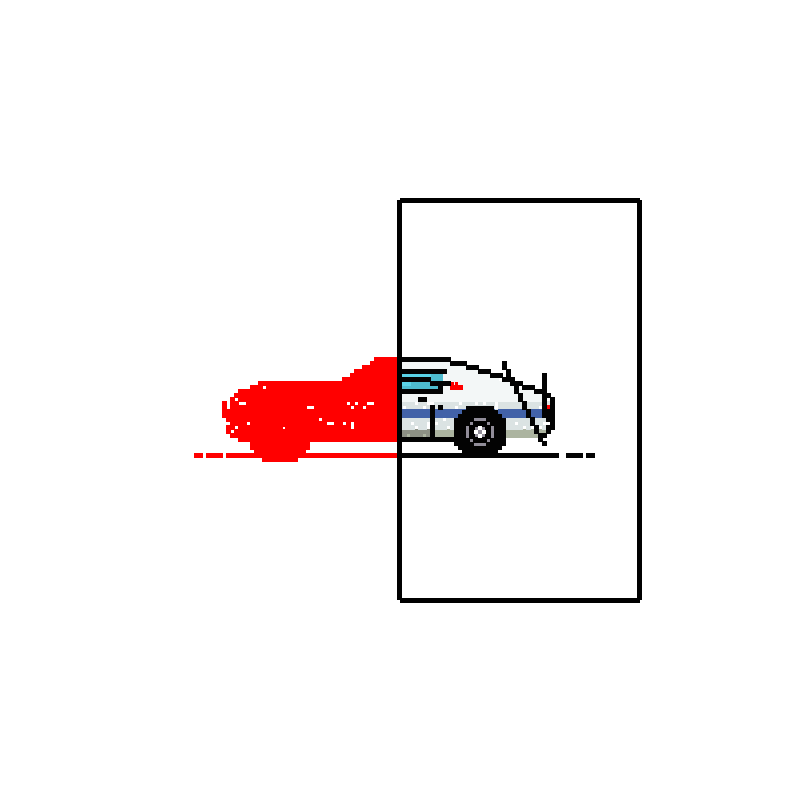

In [66]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)

7
(2, -4, 4, -3)
(2, -4)
